In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras import Input
from keras import backend as K
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import Adam

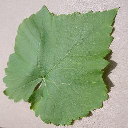

In [2]:
# test
img1_path = "./train/healthy/healthy (1).JPG"
img1 = load_img(img1_path, target_size = (128, 128))
# img_to_array(img1) to convert image to array

img1

> img_to_array(img1) # to convert image to array

## Image processing

In [3]:
# no_of_images_to_load_in_each_folder = 500

image_arrays = list()
labels = list()
train_dir = os.path.join('./', 'train')
class_list = os.listdir(train_dir)

for each_class in class_list:
    image_names = os.listdir(f"{train_dir}/{each_class}/")

    # for each_image in image_names[:no_of_images_to_load_in_each_folder]:   use this to limit the number of loaded images
    for each_image in image_names:
        image_full_path = f"{train_dir}/{each_class}/{each_image}"
        temp_image = load_img(image_full_path, target_size = (256, 256))
        image_arrays.append(img_to_array(temp_image))
        labels.append(each_class)

print('Number of images : ', len(image_arrays))
print('Number of labels : ', len(labels))

Number of images :  4639
Number of labels :  4639


In [4]:
# take a look at data - first image

image_arrays[1]

array([[[111.,  96.,  99.],
        [114.,  99., 102.],
        [104.,  89.,  92.],
        ...,
        [199., 194., 201.],
        [178., 173., 180.],
        [165., 160., 167.]],

       [[ 90.,  75.,  78.],
        [112.,  97., 100.],
        [124., 109., 112.],
        ...,
        [177., 172., 179.],
        [158., 153., 160.],
        [175., 170., 177.]],

       [[128., 113., 116.],
        [119., 104., 107.],
        [106.,  91.,  94.],
        ...,
        [149., 144., 151.],
        [160., 155., 162.],
        [177., 172., 179.]],

       ...,

       [[138., 122., 123.],
        [161., 145., 146.],
        [156., 140., 141.],
        ...,
        [177., 172., 178.],
        [175., 170., 176.],
        [172., 167., 173.]],

       [[168., 152., 153.],
        [175., 159., 160.],
        [167., 151., 152.],
        ...,
        [178., 173., 179.],
        [176., 171., 177.],
        [172., 167., 173.]],

       [[146., 130., 131.],
        [149., 133., 134.],
        [153., 1

In [5]:
# scale the image, and look at first image data

scaled_image_arrays = np.array(image_arrays, dtype = np.float32) / 255
print(len(scaled_image_arrays))
scaled_image_arrays[1]

4639


array([[[0.43529412, 0.3764706 , 0.3882353 ],
        [0.44705883, 0.3882353 , 0.4       ],
        [0.40784314, 0.34901962, 0.36078432],
        ...,
        [0.78039217, 0.7607843 , 0.7882353 ],
        [0.69803923, 0.6784314 , 0.7058824 ],
        [0.64705884, 0.627451  , 0.654902  ]],

       [[0.3529412 , 0.29411766, 0.30588236],
        [0.4392157 , 0.38039216, 0.39215687],
        [0.4862745 , 0.42745098, 0.4392157 ],
        ...,
        [0.69411767, 0.6745098 , 0.7019608 ],
        [0.61960787, 0.6       , 0.627451  ],
        [0.6862745 , 0.6666667 , 0.69411767]],

       [[0.5019608 , 0.44313726, 0.45490196],
        [0.46666667, 0.40784314, 0.41960785],
        [0.41568628, 0.35686275, 0.36862746],
        ...,
        [0.58431375, 0.5647059 , 0.5921569 ],
        [0.627451  , 0.60784316, 0.63529414],
        [0.69411767, 0.6745098 , 0.7019608 ]],

       ...,

       [[0.5411765 , 0.47843137, 0.48235294],
        [0.6313726 , 0.5686275 , 0.57254905],
        [0.6117647 , 0

## Labels and Classes

In [6]:
# convert labels to binary

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(labels)

In [7]:
# labels

label_binarizer.classes_

array(['healthy', 'unhealthy'], dtype='<U9')

In [8]:
n_classes = len(label_binarizer.classes_)
print('number of classes : ', n_classes)

number of classes :  2


## Split the data into train & test

In [9]:
# test 30% , train 70%

x_train, x_test, y_train, y_test = train_test_split(scaled_image_arrays, image_labels, test_size = 0.3, random_state = 1)

## Build the CNN model

In [10]:
# image height, width, depth
WIDTH = 256
HEIGHT = 256
DEPTH = 3
# hyperparameters
EPOCHS = 20
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32

In [11]:
# Build the model, add layers

model = Sequential()
inputShape=(HEIGHT, WIDTH, DEPTH)

if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1

# first convolution
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second convolution
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third convolution
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# fourth convolution
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# fifth convolution
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the results
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))

# output layer, 1 output neuron 0/1
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [12]:
# Augment data 

augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

## Train the CNN model

In [13]:
# Initialize optimizer
opt = Adam(lr=LR, decay=LR / EPOCHS)

# Compile model
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train generator
train_generator = augment.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Train model
cnn_model = model.fit(train_generator,
                      validation_data=(x_test, y_test),
                      steps_per_epoch=len(x_train) // BATCH_SIZE,
                      epochs=EPOCHS, 
                      verbose=1)


Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
101/101 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.7897WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020A9A88A0D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

## Evaluate model

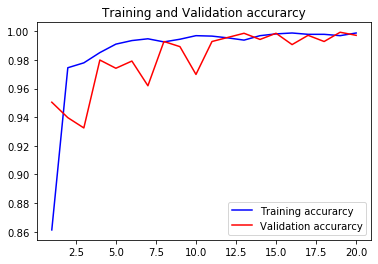

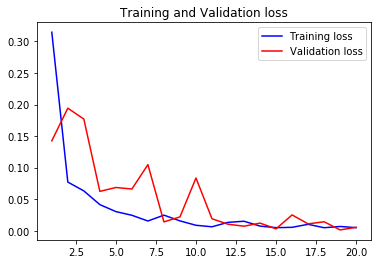

In [14]:
acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [15]:
scores = model.evaluate(x_test, y_test)
print(f"Model Accuracy: {scores[1]*100}")

44/44 [==============================] - 1s 17ms/step - loss: 0.0054 - accuracy: 0.9971
Model Accuracy: 99.71264600753784
